# Flowchart

![flowchart](https://raw.githubusercontent.com/Mfys212/dokumen/main/Blank%20diagram%20(2).png)

# Persiapan Dataset

In [ ]:
import requests

url = 'https://raw.githubusercontent.com/Mfys212/dokumen/main/kaggle.json'
destination = '/content/kaggle.json'

response = requests.get(url)
if response.status_code == 200:
  with open(destination, 'wb') as file:
    file.write(response.content)
  print(f'Succes {destination}')
else:
  print(f'Failed: {response.status_code}')

Succes /content/kaggle.json


In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c gammafest24
!unzip /content/gammafest24.zip

# Persiapan Package dan Library yang Dibutuhkan

In [ ]:
!pip uninstall torch torchvision -y
!pip install torch==1.11.0 torchvision==0.12.0 -f https://download.pytorch.org/whl/cu121/torch_stable.html
!git clone https://github.com/xinntao/Real-ESRGAN.git
%cd Real-ESRGAN
!pip install basicsr
!pip install facexlib
!pip install gfpgan
!pip install -r requirements.txt
!python setup.py develop
!pip install ultralytics
!pip install roboflow

Found existing installation: torch 2.2.1+cu121
Uninstalling torch-2.2.1+cu121:
  Successfully uninstalled torch-2.2.1+cu121
Found existing installation: torchvision 0.17.1+cu121
Uninstalling torchvision-0.17.1+cu121:
  Successfully uninstalled torchvision-0.17.1+cu121
Looking in links: https://download.pytorch.org/whl/cu121/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 MB 789.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 39.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.2.1+cu121 requires torch==2.2.1, but you have torch 1.11.0 which is incompatible.
torchdata 0.7.1 requires torch>=2, but you have torch 1.11.0 which is incompatible.
torchtext 0.17.1 requires torch==2.2.1, but you have torch 1.11.0 which is incompatible.
Cloning into 'Real-ESRGAN'...
remote: Enumeratin

In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from google.colab import files
from google.colab.patches import cv2_imshow
import shutil
from ultralytics import YOLO
from roboflow import Roboflow
import yaml

# Exploratory Data Analysis and Data Processing

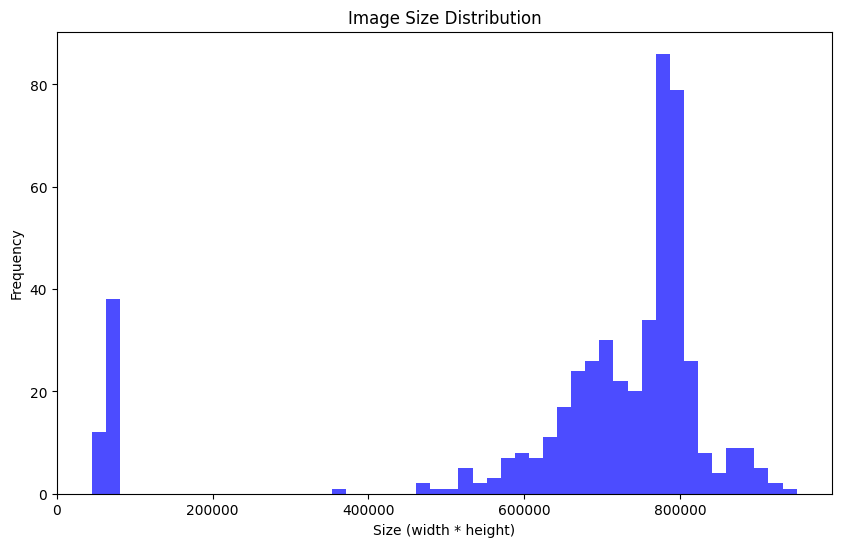

In [ ]:
dataset_dir = '/content/Train'
sizes = []
for image_name in os.listdir(dataset_dir):
  image_path = os.path.join(dataset_dir, image_name)
  image = cv2.imread(image_path)
  sizes.append(image.shape[0] * image.shape[1])
sizes_distribution = np.unique(sizes, return_counts=True)

plt.figure(figsize=(10, 6))
plt.hist(sizes, bins=50, color='blue', alpha=0.7)
plt.title('Image Size Distribution')
plt.xlabel('Size (width * height)')
plt.ylabel('Frequency')
plt.show()

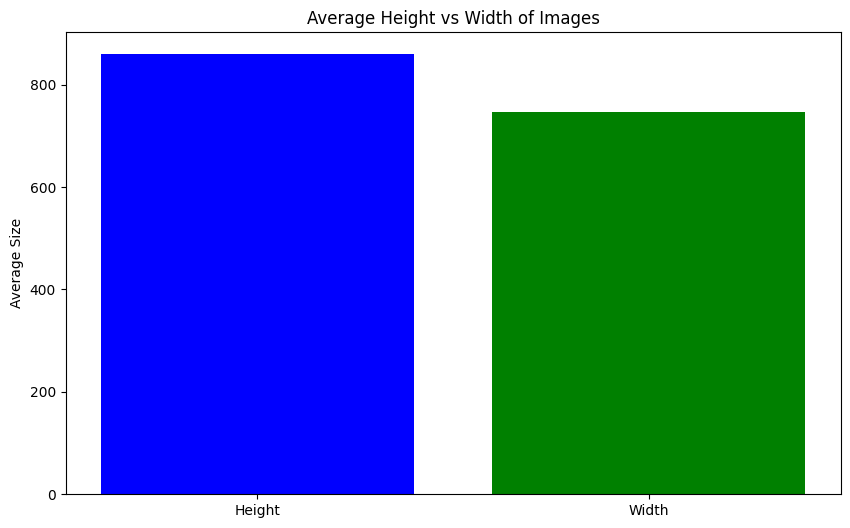

In [ ]:
heights, widths = [], []

for image_name in os.listdir(dataset_dir):
  image_path = os.path.join(dataset_dir, image_name)
  image = cv2.imread(image_path)
  heights.append(image.shape[0])
  widths.append(image.shape[1])

avg_height = np.mean(heights)
avg_width = np.mean(widths)

plt.figure(figsize=(10, 6))
plt.bar(['Height', 'Width'], [avg_height, avg_width], color=['blue', 'green'])
plt.title('Average Height vs Width of Images')
plt.ylabel('Average Size')
plt.show()

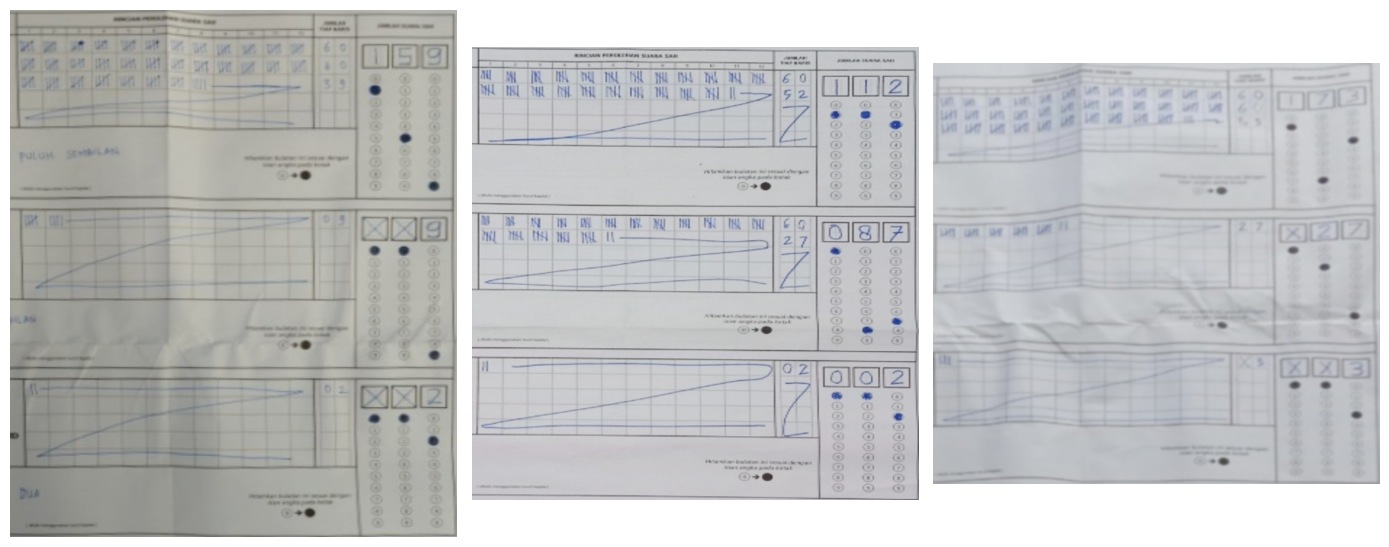

In [ ]:
dataset_dir = '/content/Train'
num_images_to_display = 3
selected_images = sorted(os.listdir(dataset_dir))[:num_images_to_display]

fig, axes = plt.subplots(1, 3, figsize=(14, 22))
for i, image_name in enumerate(selected_images):
  image_path = os.path.join(dataset_dir, image_name)
  image = cv2.imread(image_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  ax = axes[i]
  ax.imshow(image)
  ax.axis('off')

plt.tight_layout()
plt.show()

## ESRGAN

Pada processing ini menggunakan ESRGAN (Enhanced Super-Resolution Generative Adversarial Network) untuk meningkatkan resolusi gambar pada data train dan test. \\
Real-ESRGAN aims at developing Practical Algorithms for General Image/Video Restoration. \\
source: https://github.com/xinntao/Real-ESRGAN

In [ ]:
def esrgan_convert(folder, folder_path):
  upload_folder = 'upload'
  result_folder = "results"

  if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
  if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)
  os.mkdir(upload_folder)
  os.mkdir(result_folder)

  image_path = folder
  images = [file for file in os.listdir(image_path) if file.lower().endswith('.jpg')]

  for file_name in images:
    path_file = os.path.join(image_path, file_name)
    path_tujuan = os.path.join(upload_folder, file_name)
    shutil.copy(path_file, path_tujuan)
  !python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 3.5 --face_enhance

  if os.path.isdir(folder_path):
    shutil.rmtree(folder_path)
  os.mkdir(folder_path)

  image_path = result_folder
  images = [file for file in os.listdir(image_path) if file.lower().endswith('.jpg')]

  for file_name in images:
    source_file = os.path.join(image_path, file_name)
    destination_file = os.path.join(folder_path, file_name)
    shutil.copyfile(source_file, destination_file)

esrgan_convert("/content/Train", "/content/Train_s")
esrgan_convert("/content/Test", "/content/Test_s")

Testing 0 TPS_001
Testing 1 TPS_002
Testing 2 TPS_003
Testing 3 TPS_004
Testing 4 TPS_005
Testing 5 TPS_006
Testing 6 TPS_007
Testing 7 TPS_008
Testing 8 TPS_009
Testing 9 TPS_010
Testing 10 TPS_011
Testing 11 TPS_012
Testing 12 TPS_013
Testing 13 TPS_014
Testing 14 TPS_015
Testing 15 TPS_016
Testing 16 TPS_017
Testing 17 TPS_018
Testing 18 TPS_019
Testing 19 TPS_020
Testing 20 TPS_021
Testing 21 TPS_022
Testing 22 TPS_023
Testing 23 TPS_024
Testing 24 TPS_025
Testing 25 TPS_026
Testing 26 TPS_027
Testing 27 TPS_028
Testing 28 TPS_029
Testing 29 TPS_030
Testing 30 TPS_031
Testing 31 TPS_032
Testing 32 TPS_033
Testing 33 TPS_034
Testing 34 TPS_035
Testing 35 TPS_036
Testing 36 TPS_037
Testing 37 TPS_038
Testing 38 TPS_039
Testing 39 TPS_040
Testing 40 TPS_041
Testing 41 TPS_042
Testing 42 TPS_043
Testing 43 TPS_044
Testing 44 TPS_045
Testing 45 TPS_046
Testing 46 TPS_047
Testing 47 TPS_048
Testing 48 TPS_049
Testing 49 TPS_050
Testing 50 TPS_051
Testing 51 TPS_052
Testing 52 TPS_053
Tes

In [ ]:
def zip(folder, zip_name):
  if os.path.exists(zip_name):
    os.remove(zip_name)
  os.system(f"zip -r -j {zip_name} {folder}/*")

zip('/content/Train_s', "New_Train.zip")
zip('/content/Test_s', "New_Test.zip")

Data hasil ESRGAN

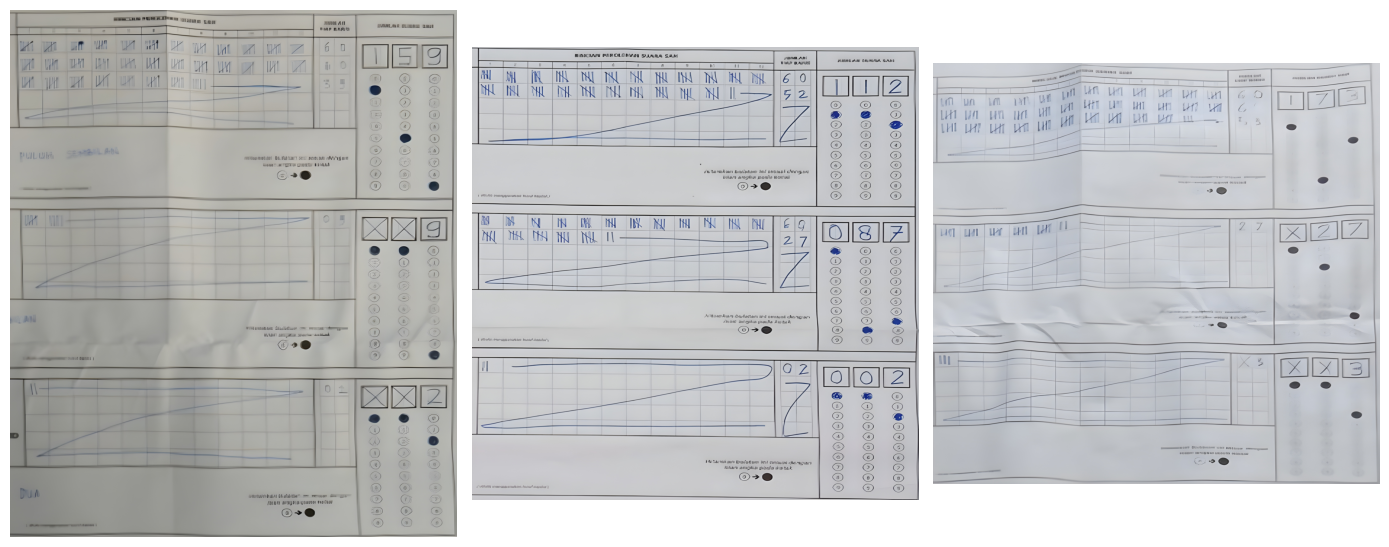

In [ ]:
dataset_dir = '/content/Train_s'
num_images_to_display = 3
selected_images = sorted(os.listdir(dataset_dir))[:num_images_to_display]

fig, axes = plt.subplots(1, 3, figsize=(14, 22))
for i, image_name in enumerate(selected_images):
  image_path = os.path.join(dataset_dir, image_name)
  image = cv2.imread(image_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  ax = axes[i]
  ax.imshow(image)
  ax.axis('off')

plt.tight_layout()
plt.show()

Setelah dilakukan menerapkan ESRGAN pada data train dan test selanjutnya melakukan anotasi data untuk pelabelan pada roboflow pada data train asli yang tidak menggunakan ESRGAN agar lebih bervariasi dengan adanya gambar yang buram sedangkan pada data test menggunakan data hasil ESRGAN agar lebih tajam.

## Download Hasil Anotasi Roboflow

Dataset: https://universe.roboflow.com/deteksi-suara-pemilu/deteksi-suara-pemilu/dataset/2

In [ ]:
rf = Roboflow(api_key="Ac7cLzVynhfk3XYvG6kL")
project = rf.workspace("deteksi-suara-pemilu").project("deteksi-suara-pemilu")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.2, to fix: `pip install ultralytics==8.0.196`


Extracting Dataset Version Zip to Deteksi-Suara-Pemilu-2 in yolov8:: 100%|██████████| 3006/3006 [00:00<00:00, 7144.12it/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Model (YOLOv8n)

In [ ]:
from ultralytics import YOLO

def yolo():
  model = YOLO("yolov8n")
  return model, model.info()

import yaml

def read_yaml(file_name):
  with open(file_name, 'r') as file:
    data = yaml.safe_load(file)
  return data

def write_yaml(file_name, data):
  with open(file_name, 'w') as file:
    yaml.safe_dump(data, file)

def replace_word(data, old_word, new_word):
  if isinstance(data, dict):
    for key, value in data.items():
      if isinstance(value, (dict, list)):
        replace_word(value, old_word, new_word)
      elif isinstance(value, str):
        data[key] = value.replace(old_word, new_word)
  elif isinstance(data, list):
    for item in data:
      if isinstance(item, (dict, list)):
        replace_word(item, old_word, new_word)
      elif isinstance(item, str):
        data[data.index(item)] = item.replace(old_word, new_word)

model, info = yolo()
data_name = dataset.location + '/data.yaml'
data = read_yaml(data_name)

replace_word(data, '../test/images', 'train/images')
replace_word(data, 'Deteksi-Suara-Pemilu-2/train/images', 'train/images')
replace_word(data, 'Deteksi-Suara-Pemilu-2/valid/images', 'train/images')

write_yaml(data_name, data)
info

100%|██████████| 6.23M/6.23M [00:00<00:00, 174MB/s]


YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs


(225, 3157200, 0, 8.8575488)

In [ ]:
# model.train(data=data_name, epochs=100, imgsz=640)
# model = YOLO("best (7).pt")
# model.train(data=data_name, epochs=10, imgsz=640)
model = YOLO("/content/drive/MyDrive/best (3).pt")

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=best (7).pt, data=/content/Deteksi-Suara-Pemilu-2/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=

100%|██████████| 755k/755k [00:00<00:00, 45.0MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning /content/Deteksi-Suara-Pemilu-2/train/labels... 1500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1500/1500 [00:01<00:00, 1134.72it/s]

train: New cache created: /content/Deteksi-Suara-Pemilu-2/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 81, len(boxes) = 13500. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/Deteksi-Suara-Pemilu-2/train/labels.cache... 1500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1500/1500 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 81, len(boxes) = 13500. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.54G     0.6783     0.3645     0.8604         92        640: 100%|██████████| 94/94 [00:15<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:08<00:00,  5.70it/s]

                   all       1500      13500      0.996      0.996      0.995      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.49G     0.7139     0.3939     0.8633         80        640: 100%|██████████| 94/94 [00:09<00:00,  9.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:06<00:00,  6.86it/s]

                   all       1500      13500      0.994      0.996      0.994      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.49G     0.7265     0.4045     0.8688         89        640: 100%|██████████| 94/94 [00:09<00:00,  9.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:06<00:00,  7.01it/s]

                   all       1500      13500      0.993      0.997      0.994      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.49G     0.7243     0.3988      0.872         95        640: 100%|██████████| 94/94 [00:09<00:00,  9.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:06<00:00,  6.81it/s]

                   all       1500      13500      0.995      0.996      0.995      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.49G     0.7161     0.3901     0.8717         66        640: 100%|██████████| 94/94 [00:09<00:00,  9.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:06<00:00,  6.96it/s]

                   all       1500      13500      0.997      0.996      0.995      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.49G      0.709     0.3947     0.8689         96        640: 100%|██████████| 94/94 [00:09<00:00,  9.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:06<00:00,  6.80it/s]

                   all       1500      13500      0.994      0.996      0.994      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.49G     0.7045     0.3822     0.8618         83        640: 100%|██████████| 94/94 [00:09<00:00,  9.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:07<00:00,  6.69it/s]

                   all       1500      13500      0.991      0.996      0.991      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.49G      0.674      0.363     0.8586         89        640: 100%|██████████| 94/94 [00:09<00:00,  9.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:06<00:00,  7.02it/s]

                   all       1500      13500      0.996      0.997      0.994       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.49G      0.675       0.36     0.8597        103        640: 100%|██████████| 94/94 [00:09<00:00,  9.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:06<00:00,  6.85it/s]

                   all       1500      13500      0.997      0.997      0.995      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.49G     0.6471     0.3429     0.8555         99        640: 100%|██████████| 94/94 [00:09<00:00,  9.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:06<00:00,  6.80it/s]

                   all       1500      13500      0.997      0.997      0.994      0.841



10 epochs completed in 0.051 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 3007793 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:15<00:00,  3.13it/s]


                   all       1500      13500      0.997      0.997      0.994      0.841
                     0       1500       3885      0.993      0.998       0.99      0.842
                     1       1500       2349      0.997      0.996      0.994      0.851
                     2       1500       1095      0.993      0.995      0.993      0.838
                     3       1500        861      0.999          1      0.995      0.832
                     4       1500        813      0.995      0.996      0.995      0.845
                     5       1500        777          1      0.988      0.995      0.843
                     6       1500        780      0.992      0.996      0.995      0.842
                     7       1500        852          1      0.994      0.995      0.835
                     8       1500        771          1          1      0.995      0.846
                     9       1500        780      0.995          1      0.994      0.845
                     

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a26e562fe80>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.

# Setup Pipline dan Tuning Parameter untuk Prediksi Persentase Prabowo Gibran

Untuk mengambil informasi suara dari ketiga paslon pertama dilakukan pengecualian image bagian atas (header) dengan membuang $5\% \, height$ pada bagian atas lalu pengecualian $70\% \, width$ dan hanya mengambil bagian kanan gambar untuk memfokuskan daerah mark dan membagi menjadi 3 bagian daerah yang tersisa $(round(height / 3) + 20)$ atas untuk paslon1, tengah untuk paslon2, bawah untuk paslon3

In [ ]:
def prediksi(img, model, area="anis", label=True, boxs=True, show=True, params=None):
  image = img.copy()

  # results = model.predict(image, conf=params[0], iou=params[1], imgsz=params[2], augment=params[3], agnostic_nms=params[4], verbose=False)
  results = model.predict(image, verbose=False, conf=0.4, iou=0.5, augment=True, agnostic_nms=True)

  x_start_box = round(image.shape[1] * 0.70)
  y_start_box = round(image.shape[0] * 0.05)
  x_end_box = image.shape[1] - 1
  y_end_box = image.shape[0] - 1

  roi = image[y_start_box:y_end_box, x_start_box:x_end_box]
  height, width = roi.shape[:2]
  top_split = height // 3 + 20
  bottom_split = 2 * top_split

  if area not in ["anis", "prabowo", "ganjar"]:
    print("Area tidak valid")
    return

  clas = []
  boxx = []
  for result in results:
    boxes = result.boxes.cpu().numpy()
    for box in boxes:
      r = box.xyxy[0].astype(int)
      if (area == "anis" and r[1] < y_start_box + top_split and x_start_box <= r[0] <= x_end_box and y_start_box <= r[1] <= y_end_box)\
        or (area == "prabowo" and y_start_box + top_split <= r[1] <= y_start_box + bottom_split and x_start_box <= r[0] <= x_end_box and y_start_box <= r[1] <= y_end_box)\
        or (area == "ganjar" and r[1] > y_start_box + bottom_split and x_start_box <= r[0] <= x_end_box and y_start_box <= r[1] <= y_end_box):
          cls = result.names[int(box.cls[0])]
          cls = cls.replace("x", "0")
          clas.append(cls)
          boxx.append(r[0])

  sorted_clas = [x for _, x in sorted(zip(boxx, clas))]
  kelas = ''.join(sorted_clas)

  return kelas

In [ ]:
def apg(image, model, f=prediksi, show=False, params=None):
  img = image.copy()
  anis = int(f(image, model, area="anis", boxs=False, show=False, params=params))
  prabowo = int(f(image, model, area="prabowo", boxs=False, show=False, params=params))
  ganjar = int(f(image, model, area="ganjar", boxs=False, show=False, params=params))
  if show:
    cv2_imshow(img)
  return anis, prabowo, ganjar

In [ ]:
# params_grid ={
#     "conf" : [0.25, 0.4, 0.5, 0.6],
#     "iou" : [0.5, 0.6, 0.75],
#     "imgsz" : [640],
#     "augment" : [True, False],
#     "agnostic_nms" : [True, False]
# }

# def calculate_mape(actual_values, predicted_values):
#   actual_values = np.array(actual_values)
#   predicted_values = np.array(predicted_values)

#   absolute_percentage_error = np.abs((actual_values - predicted_values) / actual_values)
#   mape = np.mean(absolute_percentage_error) * 100
#   return mape

Terdapat beberapa data yang tidak beres (anomali) seperti mark yang lupa di berikan (seharusnya 1 menjadi 0) dan data terbalik, untuk data mark yang lupa diberikan diasumsikan model memprediksi 0 dan menambahkan +1 dan untuk data yang terbalik menggunakan kondisi jika tidak ada hasil yang terdeteksi (karena terbalik) maka gambar akan diputar 180 derajat ke arah jarum jam

In [ ]:
# import pandas as pd
# import itertools

# val_df = pd.read_csv("/content/tunning_card.csv")

# param_combinations = list(itertools.product(*params_grid.values()))

# best_result = None
# best_params = None
# submission = None
# P_tim_wek_wek = None
# sampel_sub = pd.read_csv("/content/sample_submission.csv")

# direktori = '/content/drive/MyDrive/New_Test'
# daftar_file = sorted(os.listdir(direktori))
# files = [file for file in daftar_file if file.endswith('.jpg')]

# for params in param_combinations:
#   test_image = []
#   for file in files:
#     path = os.path.join(direktori, file)
#     img = cv2.imread(path)
#     if img is not None:
#       if "600" in path:
#         kernel_width = int(0.7 * 6) // 2 * 2 + 1
#         img = cv2.GaussianBlur(img, (kernel_width, kernel_width), sigmaX=0)
#       if "650" in path:
#         img = np.clip(img.astype(int) - 50, 0, 255).astype(np.uint8)
#       test_image.append(img)

#   res, a, p, g = [], [], [], []
#   for i in range(len(test_image)):
#     try:
#       anis, prabowo, ganjar = apg(test_image[i], model, f=prediksi, params = params)
#       prabowo += 1 if i == 147 else 0
#       anis += 1 if i == 105 else 0
#       has = prabowo/(anis+prabowo+ganjar)
#     except:
#       has = 0.0
#       anis, prabowo, ganjar = 0, 0, 0
#     res.append(has)
#     a.append(anis)
#     p.append(prabowo)
#     g.append(ganjar)

#   tim_wek_wek = pd.DataFrame({"tps":sampel_sub["TPS"], "suara_paslon_1":a, "suara_paslon_2":p, "suara_paslon_3":g})
#   sampel_sub["Persentase Suara Sah Paslon 2"] = res

#   for _ in range(2):
#     if len(sampel_sub.loc[sampel_sub['Persentase Suara Sah Paslon 2'] == 0.0].index.tolist()) > 0:
#       res2, a, p, g = [], [], [], []
#       for idx in sampel_sub.loc[sampel_sub['Persentase Suara Sah Paslon 2'] == 0.0].index.tolist():
#         image = test_image[idx]
#         center = (image.shape[1] // 2, image.shape[0] // 2)
#         rotation_matrix = cv2.getRotationMatrix2D(center, 180, 1.0)
#         rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))
#         try:
#           anis, prabowo, ganjar = apg(rotated_image, model, f=prediksi, params = params)
#           has = prabowo/(anis+prabowo+ganjar)
#         except:
#           has = 0.0
#           anis, prabowo, ganjar = 0, 0, 0
#         res2.append(has)
#         a.append(anis)
#         p.append(prabowo)
#         g.append(ganjar)

#       tim_wek_wek.loc[sampel_sub.loc[sampel_sub['Persentase Suara Sah Paslon 2'] == 0.0].index, 'suara_paslon_1'] = a
#       tim_wek_wek.loc[sampel_sub.loc[sampel_sub['Persentase Suara Sah Paslon 2'] == 0.0].index, 'suara_paslon_2'] = p
#       tim_wek_wek.loc[sampel_sub.loc[sampel_sub['Persentase Suara Sah Paslon 2'] == 0.0].index, 'suara_paslon_3'] = g
#       sampel_sub.loc[sampel_sub.loc[sampel_sub['Persentase Suara Sah Paslon 2'] == 0.0].index, 'Persentase Suara Sah Paslon 2'] = res2
#     else:
#       break
#   actual = (val_df["suara_paslon_2"] / (val_df["suara_paslon_1"] + val_df["suara_paslon_2"] + val_df["suara_paslon_3"])).tolist()
#   predicted = (tim_wek_wek["suara_paslon_2"] / (tim_wek_wek["suara_paslon_1"] + tim_wek_wek["suara_paslon_2"] + tim_wek_wek["suara_paslon_3"])).tolist()
#   predicted = [0 if np.isnan(x) else x for x in predicted]
#   current_result = calculate_mape(actual, predicted)
#   if best_result is None or current_result < best_result:
#     best_result = current_result
#     best_params = params
#     submission = sampel_sub
#     P_tim_wek_wek = tim_wek_wek
#   # print("params:", params)
#   print("result:", current_result)
#   break

# # print("Best Params: ", best_params)
# # print("Best Result: ", best_result)

result: 0.0


Setelah melakukan tunning prameter didapat parameter terbaik yaitu: \\
$\textbf{conf=0.4}$ \\
$\textbf{iou=0.5}$ \\
$\textbf{augment=True}$ \\
$\textbf{agnostic_nms=True}$ \\

Penjelasan: \\
1. $\textbf{conf}$ (Confidence Threshold) \\
Misal $c_i$ adalah skor kepercayaan dari deteksi objek $i$, maka objek tersebut akan dianggap valid jika $c_i \ge \textbf{conf}$.
2. $\textbf{iou}$ (Intersection over Union Threshold) \\
Misal $B_{p_i}$ adalah bounding box dari deteksi objek ke $i$ dan $B_{p_j}$ adalah bounding box dari deteksi objek ke $j$, maka kedua bounding box tersebut dianggap deteksi yang overlap (tumpang tindih) jika $IoU(B_{p_i}, B_{p_j}) = \frac{B_{p_i} \cap B_{p_j}}{B_{p_i} \cup B_{p_j}} \ge iou$.
3. $\textbf{augment}$ \\
Menggunakan augmentasi saat pengujian untuk prediksi.
4. $\textbf{agnostic_nms}$ \\
Menggunakan Non-Maksimum Suppression (NMS) agnostik kelas, yang menggabungkan kotak-kotak yang tumpang tindih dari berbagai kelas.

source: https://docs.ultralytics.com/modes/predict/#inference-arguments

In [ ]:
import pandas as pd

P_tim_wek_wek = None
sampel_sub = pd.read_csv("/content/sample_submission.csv")

direktori = '/content/drive/MyDrive/New_Test'
daftar_file = sorted(os.listdir(direktori))
files = [file for file in daftar_file if file.endswith('.jpg')]

test_image = []
for file in files:
  path = os.path.join(direktori, file)
  img = cv2.imread(path)
  if img is not None:
    if "600" in path:
      kernel_width = int(0.7 * 6) // 2 * 2 + 1
      img = cv2.GaussianBlur(img, (kernel_width, kernel_width), sigmaX=0)
    if "650" in path:
      img = np.clip(img.astype(int) - 50, 0, 255).astype(np.uint8)
    test_image.append(img)

res, a, p, g = [], [], [], []
for i in range(len(test_image)):
  try:
    anis, prabowo, ganjar = apg(test_image[i], model, f=prediksi)
    prabowo += 1 if i == 147 else 0
    anis += 1 if i == 105 else 0
    has = prabowo/(anis+prabowo+ganjar)
  except:
    has = 0.0
    anis, prabowo, ganjar = 0, 0, 0
  res.append(has)
  a.append(anis)
  p.append(prabowo)
  g.append(ganjar)

tim_wek_wek = pd.DataFrame({"tps":sampel_sub["TPS"], "suara_paslon_1":a, "suara_paslon_2":p, "suara_paslon_3":g})
sampel_sub["Persentase Suara Sah Paslon 2"] = res

for _ in range(2):
  if len(sampel_sub.loc[sampel_sub['Persentase Suara Sah Paslon 2'] == 0.0].index.tolist()) > 0:
    res2, a, p, g = [], [], [], []
    for idx in sampel_sub.loc[sampel_sub['Persentase Suara Sah Paslon 2'] == 0.0].index.tolist():
      image = test_image[idx]
      center = (image.shape[1] // 2, image.shape[0] // 2)
      rotation_matrix = cv2.getRotationMatrix2D(center, 180, 1.0)
      rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))
      try:
        anis, prabowo, ganjar = apg(rotated_image, model, f=prediksi)
        has = prabowo/(anis+prabowo+ganjar)
      except:
        has = 0.0
        anis, prabowo, ganjar = 0, 0, 0
      res2.append(has)
      a.append(anis)
      p.append(prabowo)
      g.append(ganjar)

    tim_wek_wek.loc[sampel_sub.loc[sampel_sub['Persentase Suara Sah Paslon 2'] == 0.0].index, 'suara_paslon_1'] = a
    tim_wek_wek.loc[sampel_sub.loc[sampel_sub['Persentase Suara Sah Paslon 2'] == 0.0].index, 'suara_paslon_2'] = p
    tim_wek_wek.loc[sampel_sub.loc[sampel_sub['Persentase Suara Sah Paslon 2'] == 0.0].index, 'suara_paslon_3'] = g
    sampel_sub.loc[sampel_sub.loc[sampel_sub['Persentase Suara Sah Paslon 2'] == 0.0].index, 'Persentase Suara Sah Paslon 2'] = res2
  else:
    break

# Hasil Prediksi

In [ ]:
P_tim_wek_wek

,tps,suara_paslon_1,suara_paslon_2,suara_paslon_3
0,TPS_501,77,141,18
1,TPS_502,125,98,12
2,TPS_503,41,165,23
3,TPS_504,21,153,41
4,TPS_505,59,172,11
...,...,...,...,...
195,TPS_696,1,91,6
196,TPS_697,64,158,9
197,TPS_698,4,144,38
198,TPS_699,0,165,43


In [ ]:
sampel_sub['Persentase Suara Sah Paslon 2'] = sampel_sub['Persentase Suara Sah Paslon 2'].apply(lambda x: round(x * 100, 4))
P_tim_wek_wek.to_csv('Prediksi_tim wekwek.csv', index=False)
sampel_sub.to_csv('finnaly_submission.csv', index=False)